##Handling Missing Value

###Is this value missing because it wasn't recorded or because it doesn't exist?
If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. This is called imputation.

In [ ]:
import pandas as pd;
import numpy as np;
sf_permits=pd.read_csv("/content/drive/My Drive/Dataset/Building_Permits.csv");
sf_permits.head();

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sf_permits.columns;
missing_value=sf_permits.isnull().sum()
total_missing=missing_value.sum();
total_value=np.product(sf_permits.shape);
#print(total_missing*100/total_value);

In [ ]:
sf_permits.dropna().shape[0];
sf_permits_with_na_dropped=sf_permits.dropna(axis=1);
sf_permits.shape[1]-sf_permits_with_na_dropped.shape[1];
sf_permits_with_na_imputed=sf_permits.fillna(method='bfill').fillna(0);

##Scaling and Normalization

###in scaling, you're changing the range of your data, while

###in normalization, you're changing the shape of the distribution of your data.

In [ ]:
import matplotlib.pyplot as plt;
import seaborn as sns;
np.random.seed(0)
original_data=np.random.exponential(size=1000);

Scaling- transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points

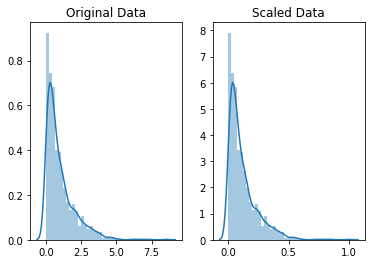

In [ ]:
from mlxtend.preprocessing import minmax_scaling;
scaled_data=minmax_scaling(original_data,columns=[0]);

fig, ax=plt.subplots(1,2);
sns.distplot(original_data,ax=ax[0]);
ax[0].set_title("Original Data");
sns.distplot(scaled_data  ,ax=ax[1]);
ax[1].set_title("Scaled Data");

Normalization-Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

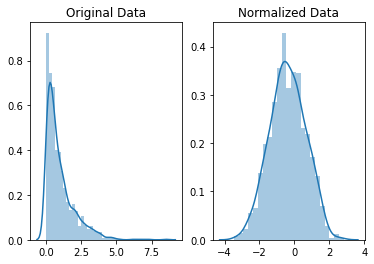

In [ ]:
from scipy import stats;
normalized_data=stats.boxcox(original_data)

fig,ax=plt.subplots(1,2);
sns.distplot(original_data,ax=ax[0]);
ax[0].set_title("Original Data");
sns.distplot(normalized_data[0],ax=ax[1]);
ax[1].set_title("Normalized Data");